### [Type]
- 1 : EWPrompt
- 2 : Signal Daughter
- 3 : EWtau daughter
- 4 : Internal Conversion daughter from t/EWV/EWlep(Implicit,Explicit)
- 5 : Internal Conversion daughter from HardScatterPhoton
- -1 : Unmatched & not EW Conversion candidate
- -2 : Hadron daughter
- -3 : Daughter of tau from hadron or parton
- -4 : Internal conversion daughter(implicit,explicit) having hadronic origin
- -5 : External conversion candidate(Hard scattered photon)
- -6 : External conversion from t/EWV/EWlep
- (-4: Daughter of Non-hard scattered photon & has parton or hadron ancestor OR implicit Conv from quark)
### -----
- 0 : Error
- \> 0 : Non-fake; Non-hadronic origin
- <0 : Fakes   ; Hadronic origin or external conversion

In [1]:
import os
from itertools import product
from ROOT import TFile, TCanvas, TH1D, TLegend, TLatex
f = TFile.Open("SKFlatOutputs/2016preVFP/IDVariables_TTLJ_powheg.root")

Welcome to JupyROOT 6.24/06


Error in <TFile::TFile>: file /Users/choij/workspace/HcToWA/IDVariables/SKFlatOutputs/2016preVFP/IDVariables_TTLJ_powheg.root does not exist


OSError: Failed to open file SKFlatOutputs/2016preVFP/IDVariables_TTLJ_powheg.root

In [109]:
def get_prompts(channel, object, ID, variable, region=None):
    hists = []
    for i in range(3):
        if region != None: h = f.Get(f"{channel}/{object}/{ID}/LeptonType-({i})/{region}/{variable}")
        else: h = f.Get(f"{channel}/{object}/{ID}/LeptonType-({i})/{variable}")
        if type(h) == TH1D: 
            h.SetDirectory(0)
            hists.append(h)
        else: 
            continue
        
    for i, h in enumerate(hists):
        if i == 0: prompts = h.Clone("fakes")
        else: prompts.Add(h)
    
    return prompts

In [110]:
def get_fakes(channel, object, ID, variable, region=None):
    hists = []
    for i in range(4):
        if region != None: h = f.Get(f"{channel}/{object}/{ID}/LeptonType-(-{i})/{region}/{variable}")
        else: h = f.Get(f"{channel}/{object}/{ID}/LeptonType-(-{i})/{variable}") 
        if type(h) == TH1D: 
            h.SetDirectory(0)
            hists.append(h)
        else: 
            continue
    
    for i, h in enumerate(hists):
        if i == 0: fakes = h.Clone("fakes")
        else: fakes.Add(h)
    
    return fakes

In [111]:
class Canvas():
    def __init__(self):
        self.cvs = TCanvas("c", "", 720, 800)
        self.legend = TLegend(0.55, 0.7, 0.87, 0.8)
        self.legend.SetFillStyle(0)
        self.legend.SetBorderSize(0)
        self.info = TLatex()
        self.info.SetTextSize(0.03)
        self.info.SetTextFont(42)
        self.logo = TLatex()
        self.logo.SetTextSize(0.04)
        self.logo.SetTextFont(61)
        self.extra_logo = TLatex()
        self.extra_logo.SetTextSize(0.035)
        self.extra_logo.SetTextFont(52)
        self.progress = TLatex()
        self.progress.SetTextSize(0.035)
        self.progress.SetTextFont(52)
    
    def get_hists(self, h_prompt, h_fake, x_title):
        self.h_prompt = h_prompt
        self.h_fake = h_fake
        nbins = self.h_prompt.GetNbinsX()
        self.h_prompt.SetBinContent(nbins, self.h_prompt.GetBinContent(nbins)+self.h_prompt.GetBinContent(nbins+1))
        self.h_fake.SetBinContent(nbins, self.h_fake.GetBinContent(nbins)+self.h_fake.GetBinContent(nbins+1))
        self.__decorate(x_title)
    
    def __decorate(self, x_title):
        self.h_prompt.SetStats(0)
        self.h_prompt.Scale(1./h_prompt.Integral())
        self.h_prompt.SetLineColor(1)
        self.h_prompt.SetLineWidth(2)
        self.h_prompt.GetXaxis().SetTitle(x_title)
        self.h_prompt.GetXaxis().SetTitleSize(0.03)
        self.h_prompt.GetXaxis().SetLabelSize(0.03)
        self.h_prompt.GetYaxis().SetTitle("A.U.")
        self.h_prompt.GetYaxis().SetTitleOffset(1.2)
        self.legend.AddEntry(self.h_prompt, "EW/Signal/EWtau Origin", "l")
        
        self.h_fake.SetStats(0)
        self.h_fake.Scale(1./h_fake.Integral())
        self.h_fake.SetLineColor(2)
        self.h_fake.SetLineWidth(2)
        self.legend.AddEntry(h_fake, "Hadronic Origin", "l")
    
    def combine(self, log=False, region=None):
        if log:
            minimum = min(self.h_prompt.GetMinimum(), self.h_fake.GetMinimum())
            self.h_prompt.GetYaxis().SetRangeUser(minimum, 10.)
            self.cvs.SetLogy()
        else:
            self.h_prompt.GetYaxis().SetRangeUser(0., 1.)
        self.cvs.cd()
        self.h_prompt.Draw("hist")
        self.h_fake.Draw("histsame")
        self.legend.Draw("same")
        self.info.DrawLatexNDC(0.62, 0.91, "normalized distribution")
        self.logo.DrawLatexNDC(0.2, 0.8, "CMS")
        self.extra_logo.DrawLatexNDC(0.2, 0.76, "Simulation")
        
        region_info = TLatex()
        region_info.SetTextSize(0.03)
        region_info.SetTextFont(42) 
        if region: region_info.DrawLatexNDC(0.56, 0.81, region)
        else: region_info.DrawLatexNDC(0.56, 0.81, "Inclusive")
            
            
    
    def draw(self):
        self.cvs.Draw()
            
    def savefig(self, figname):
        self.cvs.SaveAs(figname)
        

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


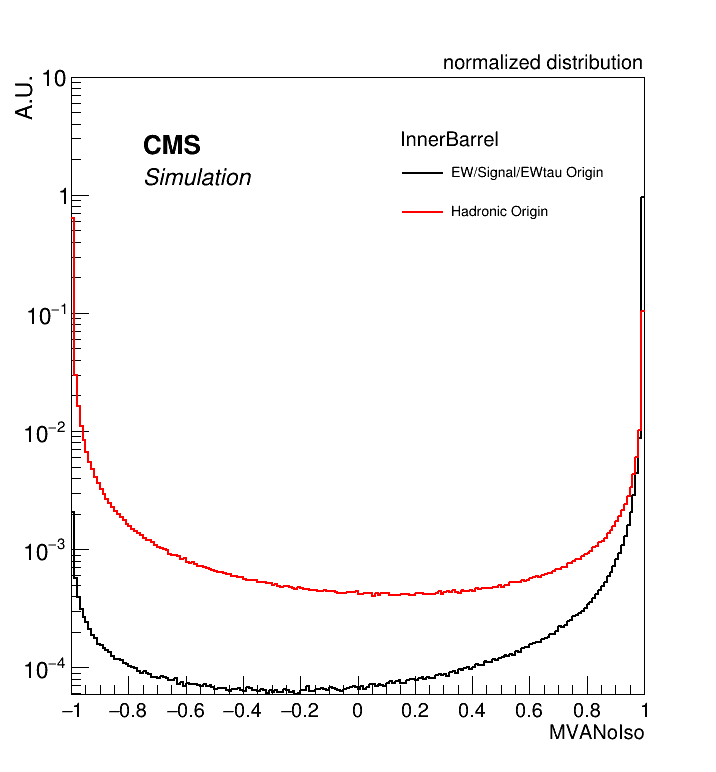

In [112]:
# Test Pannel
h_prompt = get_prompts("ejj", "electron", "NOCUT", "MVANoIso", "InnerBarrel")
h_fake = get_fakes("ejj", "electron", "NOCUT", "MVANoIso", "InnerBarrel")
cvs = Canvas()
cvs.get_hists(h_prompt, h_fake, "MVANoIso")
cvs.combine(log=True, region="InnerBarrel")
cvs.draw()

In [119]:
# Electrons
ERA = "2016preVFP"
f = TFile.Open(f"SKFlatOutputs/{ERA}/IDVariables_TTLJ_powheg.root")

IDs = ["NOCUT", "passLooseID", "passMVAID_noIso_WP90"]
ISOs = ["relIso", "trkIso", "miniRelIso"]
#IPs = ["dXY", "dZ", "IP3D", "IP3Derr", "SIP3D"]
IPs = ["dXY", "dZ", "SIP3D"]
MVAs = ["MVAIso", "MVANoIso"]; REGIONs = ["InnerBarrel", "OuterBarrel", "EndCap"]
OTHERs = ["nMissingHits", "passConversionVeto"]

for (ID, var) in product(IDs, ISOs):
    h_prompt = get_prompts("ejj", "electron", ID, var)
    h_fake = get_fakes("ejj", "electron", ID, var)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=False)
    
    path = f"plots/{ERA}/electrons"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png")
    
    del h_prompt, h_fake, cvs
    
for (ID, var) in product(IDs, IPs):
    h_prompt = get_prompts("ejj", "electron", ID, var)
    h_fake = get_fakes("ejj", "electron", ID, var)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=True)
    path = f"plots/{ERA}/electrons"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png")
    
    del h_prompt, h_fake, cvs
    
for (ID, var, region) in product(IDs, MVAs, REGIONs):
    h_prompt = get_prompts("ejj", "electron", ID, var, region)
    h_fake = get_fakes("ejj", "electron", ID, var, region)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=True, region=region)
    path = f"plots/{ERA}/electrons/{region}"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png") 
    del h_prompt, h_fake, cvs
    
for (ID, var) in product(IDs, OTHERs):
    h_prompt = get_prompts("ejj", "electron", ID, var)
    h_fake = get_fakes("ejj", "electron", ID, var)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=False)
    path = f"plots/{ERA}/electrons"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png")
    
    del h_prompt, h_fake, cvs

Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/NOCUT_relIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/NOCUT_trkIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/NOCUT_miniRelIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/passLooseID_relIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/passLooseID_trkIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2016preVFP/electrons/passLooseID_miniRelIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas wi

In [122]:
# Muons
ERA = "2018"
f = TFile.Open(f"SKFlatOutputs/{ERA}/IDVariables_TTLJ_powheg.root")

IDs = ["NOCUT", "POGLoose", "POGMedium"]
ISOs = ["relIso", "trkIso", "miniRelIso"]
#IPs = ["dXY", "dZ", "IP3D", "IP3Derr", "SIP3D"]
IPs = ["dXY", "dZ", "SIP3D"]

for (ID, var) in product(IDs, ISOs):
    h_prompt = get_prompts("mujj", "muon", ID, var)
    h_fake = get_fakes("mujj", "muon", ID, var)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=False)
    
    path = f"plots/{ERA}/muons"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png")
    
    del h_prompt, h_fake, cvs
    
for (ID, var) in product(IDs, IPs):
    h_prompt = get_prompts("mujj", "muon", ID, var)
    h_fake = get_fakes("mujj", "muon", ID, var)
    cvs = Canvas()
    cvs.get_hists(h_prompt, h_fake, var)
    cvs.combine(log=True)
    path = f"plots/{ERA}/muons"
    if not os.path.exists(path): os.makedirs(path)
    cvs.savefig(f"{path}/{ID}_{var}.png")
    
    del h_prompt, h_fake, cvs

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/NOCUT_relIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/NOCUT_trkIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/NOCUT_miniRelIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/POGLoose_relIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/POGLoose_trkIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/muons/POGLoose_miniRelIso.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas wi